# Plot gradients in speed and weather to assess timing alignments

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load datasets

In [2]:
data_path = '/Users/raineyaberle/Research/Hubbard/'
out_path = '/Users/raineyaberle/Research/Hubbard/figures/'
crs = 'EPSG:3338'

# Terminus, speed, and weather
df_fn = os.path.join(data_path, 'terminus', 'terminus_speed_weather.csv')
df = pd.read_csv(df_fn)
df['Date'] = pd.to_datetime(df['Date'])
df.drop_duplicates(inplace=True)
# Resample to daily
df.set_index('Date', inplace=True)
df = df.resample('1D').interpolate('time')
df.reset_index(inplace=True)
# Replace data gaps at Haenke (~late 2020 to mid-2021) with NaNs
df.loc[(df['Date'] >= np.datetime64('2020-11-01')) & (df['Date'] <= np.datetime64('2021-10-01')),
       ['AirTempC_Haenke1', 'AirTempC_Haenke2']] = np.nan
df

,Date,AirTempC_Haenke1,AirTempC_Haenke2,AirTempC_Yakutat,Precip_Yakutat,PDD_Haenke1,PDD_Haenke2,PDD_Yakutat,AirTempC_Yakutat_smooth,surface_speed_m_per_yr,terminus_retreat_m,frontal_ablation_m_per_yr,retreat_rate_m_per_yr
0,2017-01-23,0.469565,-0.242391,1.515000,0.013208,0.469565,0.000000,1.515000,1.167000,2199.749740,357.220294,1863.516311,-240.967385
1,2017-01-24,1.056044,0.293407,2.425824,0.018034,1.056044,0.293407,2.425824,1.015031,2208.419088,356.532690,1874.671018,-238.021979
2,2017-01-25,1.608791,0.818681,3.371143,0.017653,1.608791,0.818681,3.371143,0.862364,2217.088435,355.845086,1885.825725,-235.076572
3,2017-01-26,3.531868,2.836264,4.316461,0.017272,3.531868,2.836264,4.316461,0.709834,2225.757783,355.157482,1896.980431,-232.131166
4,2017-01-27,4.673913,4.034783,4.293488,0.017780,4.673913,4.034783,4.293488,0.556453,2234.427131,354.469878,1908.135138,-229.185760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146,2022-12-09,7.500000,7.100000,-4.850641,0.000254,7.500000,7.100000,0.000000,1.385443,678.508571,287.388602,1344.318601,691.254382
2147,2022-12-10,7.500000,7.100000,-2.436490,0.005503,7.500000,7.100000,0.797271,1.463263,694.344108,289.283163,1359.328730,691.466980
2148,2022-12-11,7.500000,7.100000,-0.022338,0.010753,7.500000,7.100000,1.594542,1.533238,710.179645,291.177725,1374.338858,691.679578
2149,2022-12-12,7.500000,7.100000,2.391813,0.016002,7.500000,7.100000,2.391813,1.565370,726.015182,293.072286,1389.348987,691.892176


## Plot the annual onsets of persistent PDDs, spring speed up, and terminus retreat

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/var/folders/9h/sg2rw9f10lq5jmfch9hnj6gc0000gq/T/ipykernel_10583/2544977710.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax[0].set_ylabel('Air temperature ($^{\circ}$C)')


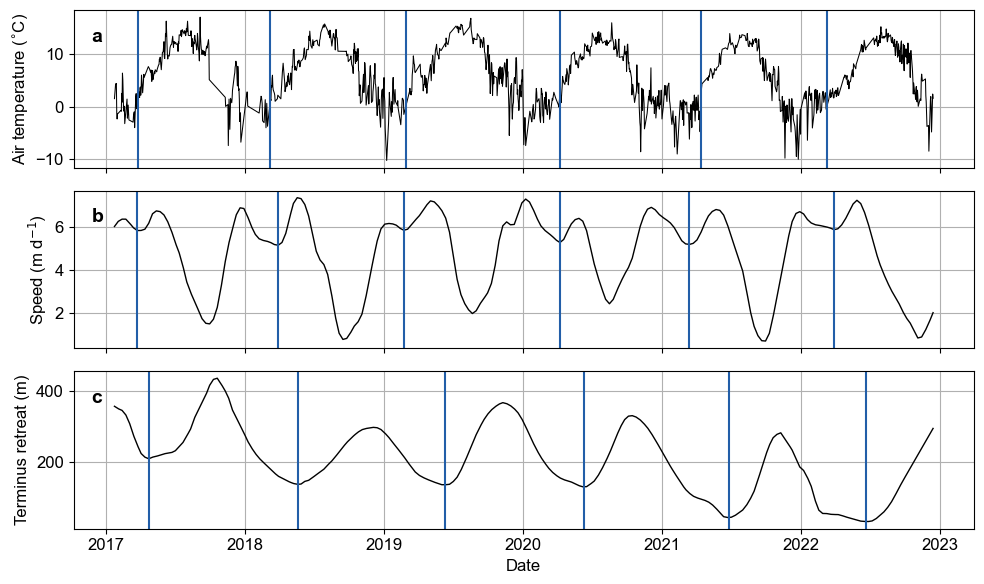

Figure saved to file: /Users/raineyaberle/Research/Hubbard/figures/speed_weather_spring_timings.png


In [3]:
fontsize = 12
linecolor='k'
linewidth = 1
onset_color = '#225ea8'
plt.rcParams.update({'font.size': fontsize, 'font.sans-serif': 'Arial'})
fig, ax = plt.subplots(3, 1, figsize=(10,6), sharex=True)

# Plot time series
ax[0].plot(df['Date'], df['AirTempC_Yakutat'], '-', color=linecolor, linewidth=linewidth-0.25)
# ax[0].plot(df['Date'], df['AirTempC_Haenke1'], '-b', linewidth=0.5)
ax[0].set_ylabel('Air temperature ($^{\circ}$C)')
ax[1].plot(df['Date'], np.divide(df['surface_speed_m_per_yr'], 365), '-', color=linecolor, linewidth=linewidth)
ax[1].set_ylabel('Speed (m d$^{-1}$)')
ax[2].plot(df['Date'], df['terminus_retreat_m'], '-', color=linecolor, linewidth=linewidth)
ax[2].set_ylabel('Terminus retreat (m)')
ax[2].set_xlabel('Date')
# Plot annual onsets
for year in df['Date'].dt.year.drop_duplicates().values:
    df_year = df.loc[(df['Date'].dt.year==year) & (df['Date'].dt.month <= 10)].reset_index()
    # persistent PDDs
    I = [i for i in range(len(df_year)) if (df_year['AirTempC_Yakutat'].iloc[i:] > 0).all()][0]
    ax[0].axvline(df_year.loc[I, 'Date'], color=onset_color)
    # spring speedup onset
    df_year_early = df_year.loc[df_year['Date'].dt.month <= 4]
    Imin = df_year_early['surface_speed_m_per_yr'].idxmin()
    ax[1].axvline(df_year_early.loc[Imin, 'Date'], color=onset_color)
    # terminus retreat onset
    date = df_year.loc[df_year['retreat_rate_m_per_yr'] > 0, 'Date'].values[0]
    ax[2].axvline(date, color=onset_color)

labels = ['a', 'b', 'c']
for axis, label in zip(ax, labels):
    # add grid
    axis.grid()
    # add panel label
    axis.text(0.02, 0.8, label, fontsize=fontsize+2, fontweight='bold', transform=axis.transAxes)

fig.tight_layout()
plt.show()

# Save figure
fig_fn = os.path.join(out_path, 'speed_weather_spring_timings.png')
fig.savefig(fig_fn, dpi=300, bbox_inches='tight')
print('Figure saved to file:', fig_fn)